* To investigate the impact of each forcing, i.e., river flow, tides, winds and Coriolis force on the plume properties and stratification.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (
    nc_tools,
    viz_tools,
    stormtools,
    tidetools,
)
import datetime, os
from glob import glob
from IPython.core.display import Image,display
from nowcast import figures
import matplotlib.pyplot as plt
import pytz 
import wind
%matplotlib inline

* First, take a look at the conditions of the selected simulations, which are Oct 2014 and May 2015, respectively.

# River flow at Hope

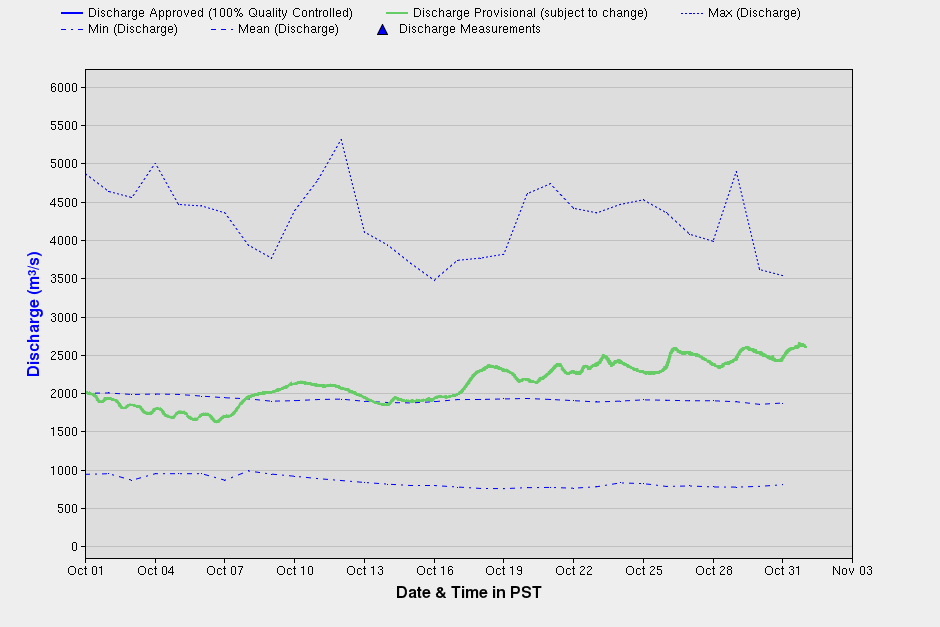

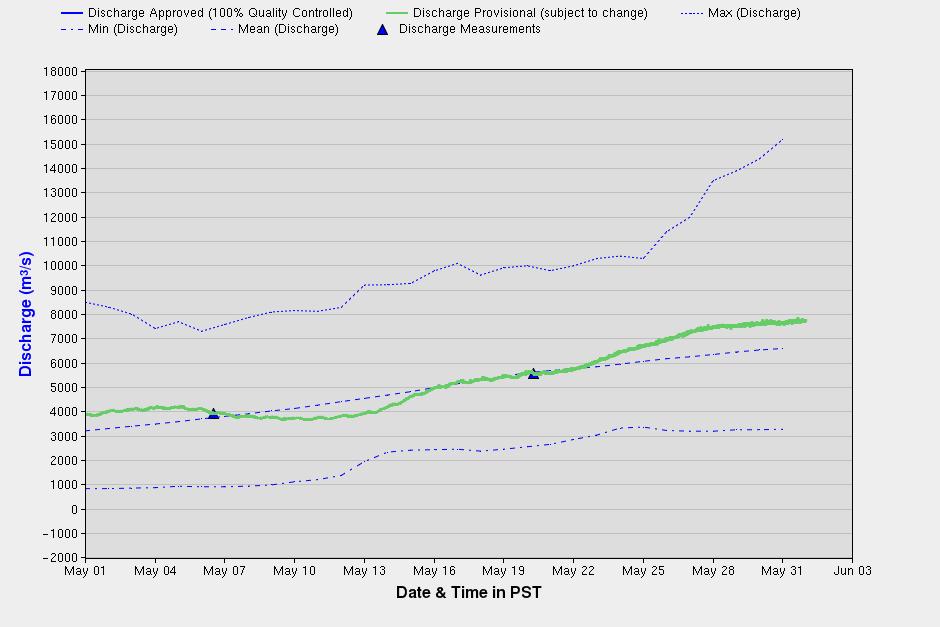

In [2]:
x = Image(filename='/ocean/jieliu/research/meopar/surface current/oct2014.png')
y = Image(filename='/ocean/jieliu/research/meopar/surface current/may2015.png')
display(x, y)

# Tides at PA

In [3]:
## load t_tide
tfile = '/ocean/jieliu/research/meopar/tools/SalishSeaNowcast/nowcast/\
tidal_predictions/Point Atkinson_t_tide_compare8_31-Dec-2013_02-Dec-2015.csv'
ttide, msl = stormtools.load_tidal_predictions(tfile)

In [4]:
def find_ind_tide(run_low, run_up, run_label1,run_label2):
    """To find index of ttide within a time range"""
    run_low = run_low.replace(tzinfo=pytz.utc) ## convert model datetime to tzinfo=<UTC>
    run_up = run_up.replace(tzinfo=pytz.utc) ## the time i want to label on the plot
    run_label1 = run_label1.replace(tzinfo=pytz.utc)
    run_label2 = run_label2.replace(tzinfo=pytz.utc)
    ttide_dt  = ttide.time.dt.to_pydatetime() ## convert ttide.time (pandas) to datetime
    for i in range(len(ttide_dt)):
        if ttide_dt[i]== run_low:
            low_ind = i
        if ttide_dt[i]== run_up:
            up_ind = i  
        if ttide_dt[i]== run_label1:
            lab_ind1 = i  
        if ttide_dt[i]== run_label2:
            lab_ind2 = i  
    return low_ind, up_ind, lab_ind1,lab_ind2

In [12]:
run_low = datetime.datetime(2014,9,10)
run_up = datetime.datetime(2014,10,31)
run_label1 = datetime.datetime(2014,9,24)
run_label2 = datetime.datetime(2014,10,1)
low_ind,up_ind,lab_ind1,lab_ind2 = find_ind_tide(run_low,run_up,run_label1,run_label2)

(-2.5, 2.5)

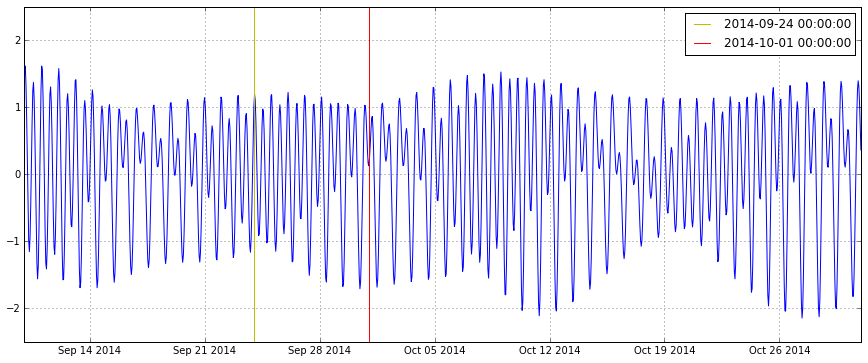

In [13]:
fig, ax = plt.subplots(1,1,figsize = (15,6))
ax.plot(ttide.time[low_ind:up_ind], ttide.pred_all[low_ind:up_ind])
ax.plot([ttide.time[lab_ind1],ttide.time[lab_ind1]],[-2.5,2.5],'y-',label = run_label1)
ax.plot([ttide.time[lab_ind2],ttide.time[lab_ind2]],[-2.5,2.5],'r-',label = run_label2)
ax.grid('on')
ax.legend()
ax.set_ylim(-2.5,2.5)

(-2.5, 2.5)

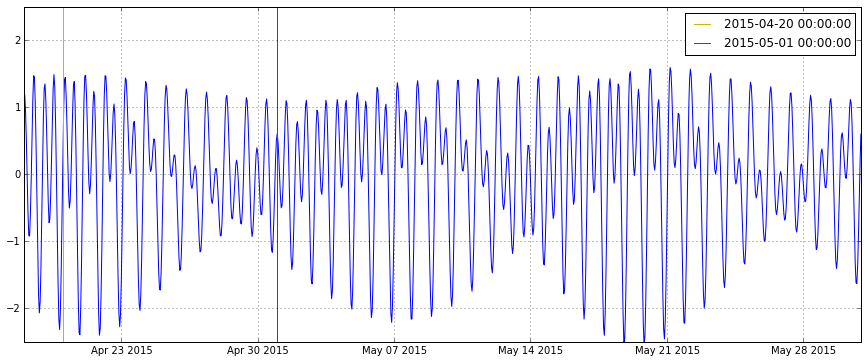

In [7]:
run_low = datetime.datetime(2015,4,18)
run_up = datetime.datetime(2015,5,31)
run_label1 = datetime.datetime(2015,4,20)
run_label2 = datetime.datetime(2015,5,1)
low_ind,up_ind,lab_ind1,lab_ind2 = find_ind_tide(run_low,run_up,run_label1,run_label2)
fig, ax = plt.subplots(1,1,figsize = (15,6))
ax.plot(ttide.time[low_ind:up_ind], ttide.pred_all[low_ind:up_ind])
ax.plot([ttide.time[lab_ind1],ttide.time[lab_ind1]],[-2.5,2.5],'y-',label = run_label1)
ax.plot([ttide.time[lab_ind2],ttide.time[lab_ind2]],[-2.5,2.5],'r-',label = run_label2)
ax.grid('on')
ax.legend()
ax.set_ylim(-2.5,2.5)

# Winds at Sand Heads

In [8]:
OP = nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d01.nc')
OPlon =OP.variables['nav_lon'][:]-360
OPlat = OP.variables['nav_lat'][:]

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


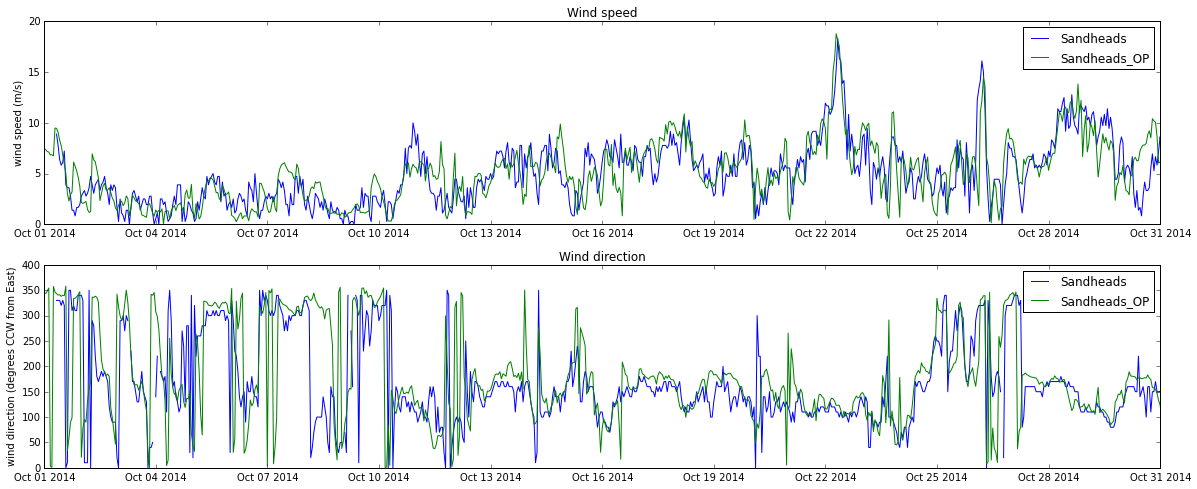

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


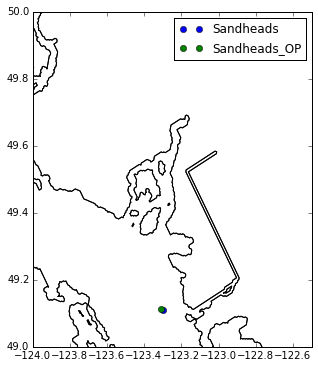

In [11]:
import glob
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2014m10d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-Oct-2014'; end = '31-Oct-2014';
start2 = '31-Oct-2014'; end2 = '31-Oct-2014';
endd = '31-Oct-2014';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =wind.compare_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


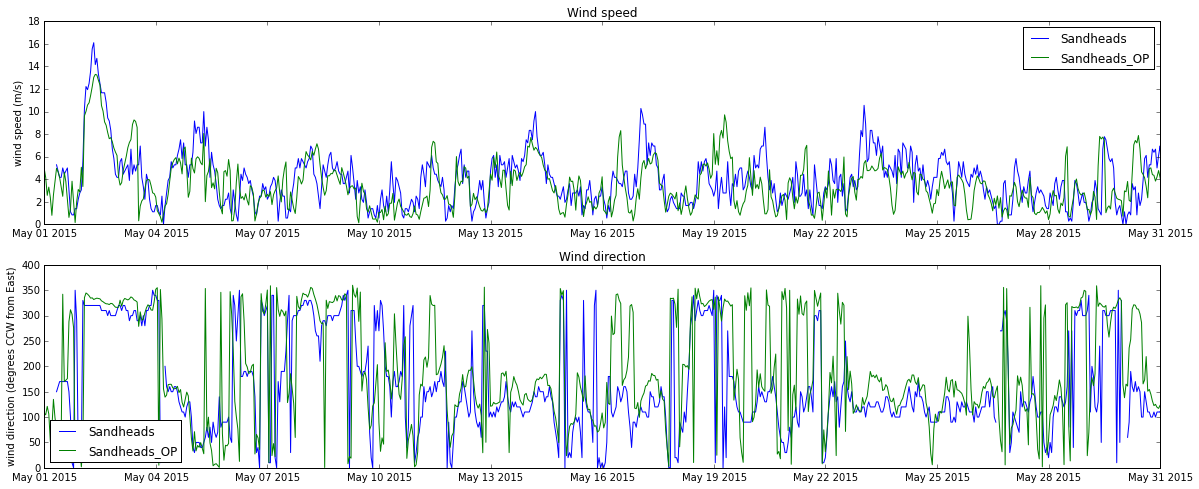

/home/jieliu/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


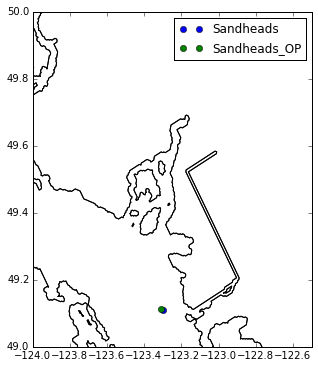

In [10]:
filesOP = glob.glob('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m05d*.nc')
filesOP.sort(key=os.path.basename)
start = '1-May-2015'; end = '31-May-2015';
start2 = '31-May-2015'; end2 = '31-May-2015';
endd = '31-May-2015';
stations = ['Sandheads']; stationsOP =['Sandheads_OP'];
sax=datetime.datetime.strptime(start,'%d-%b-%Y')
eax=datetime.datetime.strptime(endd,'%d-%b-%Y')

ax =wind.compare_winds(start, end, start2, end2,stations,stationsOP,OPlon,OPlat,filesOP,\
                       27,'Sandheads','Sandheads_OP',sax,eax,8, 16, 0)